In [7]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import warnings
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits


In [8]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head(10)

,Evento,C1,Duración_(min)_pl,Intensidad_media pl,Intensidad_máxima_pl,Intensidad_continuap_pl,C_(mm_est,Duración_(min)_esta,Intensidad_media_est,Intensidad_máxima_est,...,Hs_80,Hs_100,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,Qmax,Trespuesta_(min)_plub,Trespuesta_est,Q_inicial
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850000,...,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,105.0,100.0,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375000,...,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,115.0,125.0,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375000,...,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,105.0,105.0,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125000,...,0.572852,0.534618,1.000000,1.0,1.000000,1.0,15.663358,70.0,65.0,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875000,...,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,75.0,80.0,13.085455
5,Evento 6,24.434833,340,4.312029,173.542846,15.202500,23.40,400,3.510000,44.791667,...,0.581322,0.542613,3.332023,2.8,3.332023,2.8,23.893522,320.0,325.0,11.809956
6,Evento 7,3.054354,55,3.332023,69.417139,6.000000,2.80,65,2.584615,11.458333,...,0.598261,0.550609,26.656181,24.2,29.988204,27.0,14.280000,75.0,80.0,12.886883
7,Evento 8,19.436799,85,13.720093,312.370000,27.600000,15.40,45,20.533333,66.666650,...,0.594631,0.551751,20.269804,19.2,46.925986,43.4,36.390000,55.0,60.0,13.014717
8,Evento 9,5.275703,25,12.661686,69.417139,12.661686,5.00,35,8.571429,25.000000,...,0.600681,0.560889,9.718399,9.0,29.988204,28.2,16.530000,45.0,50.0,13.709470
9,Evento 10,3.609691,50,4.331629,34.708569,4.980000,3.40,65,3.138462,8.333333,...,0.601891,0.560889,9.718399,9.0,29.988204,28.2,17.006422,80.0,85.0,14.355421


In [9]:
logqmax = np.log(datos[["Qmax"]])
logqmax.head()

,Qmax
0,2.847599
1,3.009655
2,3.423205
3,2.751324
4,2.827905


In [10]:
log_expl_var = pd.DataFrame(np.log(datos[["C_(mm_est", 'Lluvia_antecedent_48_horas_est']]))
log_expl_var.head()

,C_(mm_est,Lluvia_antecedent_48_horas_est
0,2.538447,2.595255
1,2.694627,3.916015
2,3.850148,3.916015
3,2.517696,0.000000
4,1.609438,3.927896


In [11]:
train_sizes = [10, 50, 70, 90, 100,125,150,170,190]

In [12]:
features = ['C_(mm_est', 'Lluvia_antecedent_48_horas_est']
target = 'Qmax'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = KNeighborsRegressor(n_neighbors=5),
X = log_expl_var[features],
y = logqmax[target], train_sizes = train_sizes, cv = 100,
scoring = 'neg_mean_squared_error')

In [13]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.05678643 -0.05261088 -0.05115162 -0.05663355 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279 -0.03864279
  -0.03864279 -0.03

In [14]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10     0.039269
50     0.066967
70     0.071830
90     0.060985
100    0.062511
125    0.082553
150    0.089805
170    0.091566
190    0.088616
dtype: float64

 --------------------

Mean validation scores

 10     0.365593
50     0.187232
70     0.167141
90     0.179971
100    0.171921
125    0.146650
150    0.144581
170    0.147767
190    0.147289
dtype: float64


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


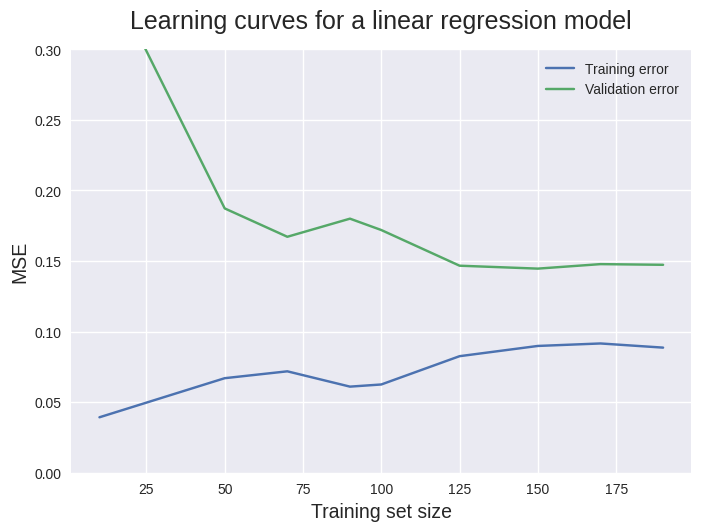

In [15]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.3)
plt.show()

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwarg

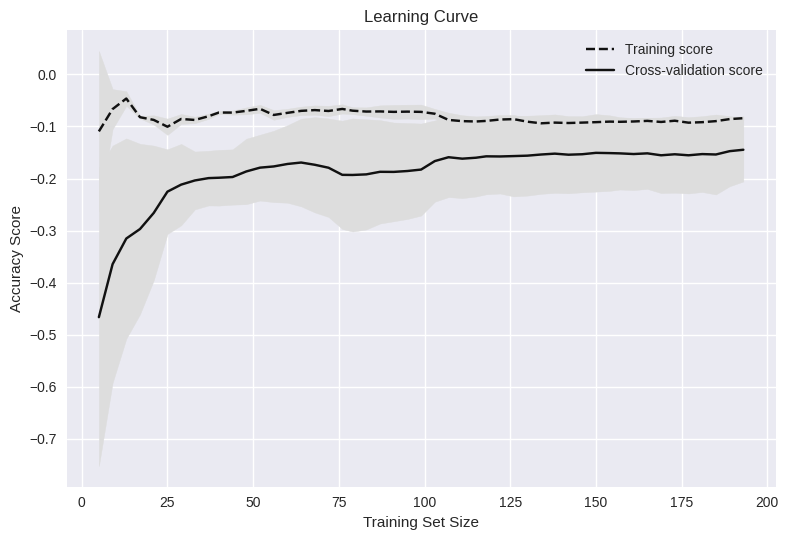

In [16]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsRegressor(n_neighbors=5), log_expl_var , logqmax,cv=10, scoring='neg_mean_squared_error', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

In [17]:
kfold = ShuffleSplit(n_splits=30, test_size=0.3, random_state=1)
model = KNeighborsRegressor(n_neighbors=5)
results = cross_val_score(model, log_expl_var ,logqmax, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[0.71248143 0.68627441 0.72369033 0.78334305 0.79051353 0.72046516
 0.75295445 0.64740035 0.665184   0.6661808  0.78307688 0.70159402
 0.75926463 0.72211794 0.78441554 0.6249686  0.75425136 0.80183141
 0.64227807 0.60483837 0.59784354 0.73823436 0.61072478 0.65904098
 0.78610774 0.7656581  0.72237611 0.69445969 0.69238884 0.65960972]
0.7084522735049698
0.05974953150310874


In [18]:
X_train,X_test, y_train,y_test = train_test_split(log_expl_var,logqmax, random_state=1)
lr=KNeighborsRegressor(n_neighbors=5)
lr.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.8117617925246199
Test score: 0.7591761042634988


In [20]:
lc = learning_curve(KNeighborsRegressor(n_neighbors=5),X_train,y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 12,  41,  70,  99, 128]),
 array([[0.2454736 , 0.23510919, 0.23510919, 0.23510919, 0.23510919],
        [0.59229624, 0.77929603, 0.69063471, 0.69063471, 0.69063471],
        [0.6421686 , 0.76260564, 0.70118111, 0.69022061, 0.69022061],
        [0.74433122, 0.77477832, 0.7856387 , 0.70395522, 0.70277917],
        [0.78484731, 0.81530639, 0.80122445, 0.76849386, 0.76927207]]),
 array([[-0.10679839,  0.39997505, -0.39385085,  0.33975988,  0.35651813],
        [ 0.63433473,  0.30031552,  0.22953539,  0.61217305,  0.75661418],
        [ 0.63488248,  0.3110368 ,  0.15729218,  0.6250094 ,  0.78458307],
        [ 0.68376668,  0.44956709,  0.19221434,  0.60890339,  0.80357435],
        [ 0.69642116,  0.45704393,  0.24365813,  0.6460672 ,  0.78955774]]))

(0.0, 1.0)

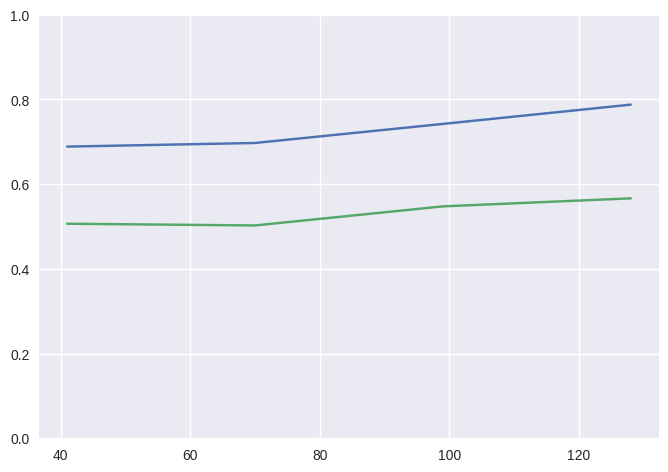

In [21]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);
plt.ylim(0,1)